**Use Clustering Techniques for the any customer dataset using machine learning**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/sample_data/Mall_Customers (1).csv')

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Data Preprocessing**

In [2]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [3]:
df["Genre"].unique()

array(['Male', 'Female'], dtype=object)

In [5]:
# Replace values in Genre column, male with 1 and female with 0
df['Genre'] = np.where(df['Genre'] == "Male", 1, 0)

print(df)

     CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1      1   19                  15                      39
1             2      1   21                  15                      81
2             3      0   20                  16                       6
3             4      0   23                  16                      77
4             5      0   31                  17                      40
..          ...    ...  ...                 ...                     ...
195         196      0   35                 120                      79
196         197      0   45                 126                      28
197         198      1   32                 126                      74
198         199      1   32                 137                      18
199         200      1   30                 137                      83

[200 rows x 5 columns]


In [6]:
# Remove the first column
df = df.drop(df.columns[0], axis=1)

In [7]:
# Change the dataset columns names
column_mapping = {'Annual Income (k$)': 'Income',
                  'Spending Score (1-100)': 'SpSc'}

# Rename the columns using the dictionary
df = df.rename(columns=column_mapping)

# Display the DataFrame with the renamed columns
print(df)

     Genre  Age  Income  SpSc
0        1   19      15    39
1        1   21      15    81
2        0   20      16     6
3        0   23      16    77
4        0   31      17    40
..     ...  ...     ...   ...
195      0   35     120    79
196      0   45     126    28
197      1   32     126    74
198      1   32     137    18
199      1   30     137    83

[200 rows x 4 columns]


**Data Visualization**

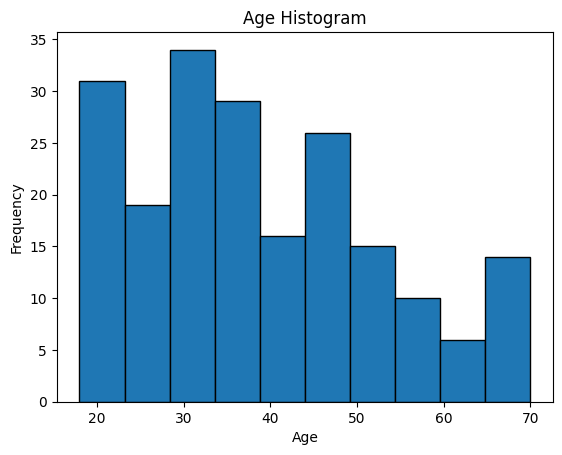

In [10]:
# Create a histogram of the 'age' column
plt.hist(df['Age'], edgecolor='black')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Histogram')

# Display the plot
plt.show()

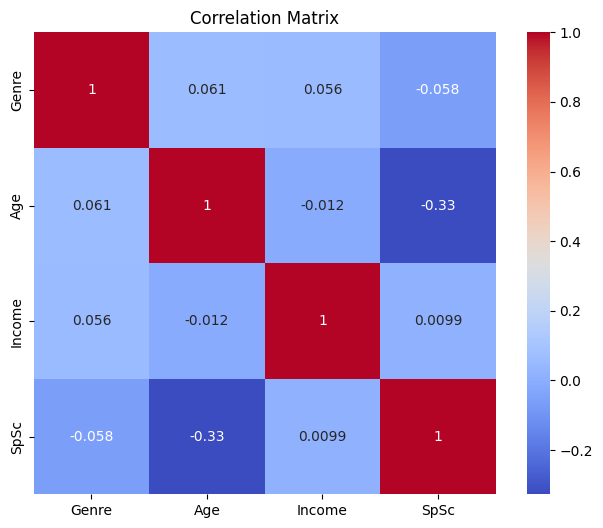

In [11]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')

# Display the plot
plt.show()

**Principal Component Analysis**

---

PCA is a data dimensionality reduction technique that also allows us to detect the features that keep the overall variance of our data.

In this dataset we see that out principal factor map is composed of Spending Score and Annual Income that -combined- keep 90% of our data variance.

Principal Component 1 (PC1): SpSc
Explained Variance Ratio for PC1: 0.4511807699215107
Principal Component 2 (PC2): Income
Explained Variance Ratio for PC2: 0.44091539254309525


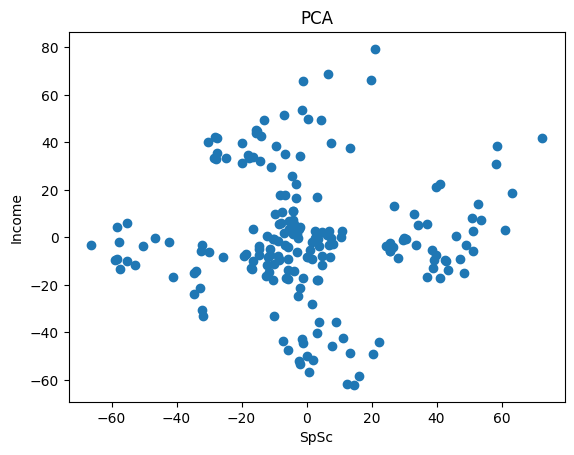

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Create a PCA instance
pca = PCA(n_components=2)

# Fit the PCA model to your data
pca.fit(df)

# Transform the data to the reduced dimensionality
reduced_data = pca.transform(df)

# Access the principal components (eigenvectors)
components = pca.components_

# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Get the feature names corresponding to PC1 and PC2
feature_names = df.columns.values
pc1_feature = feature_names[components[0].argmax()]
pc2_feature = feature_names[components[1].argmax()]

# Display the principal components and explained variance ratios
print("Principal Component 1 (PC1):", pc1_feature)
print("Explained Variance Ratio for PC1:", explained_variance_ratio[0])
print("Principal Component 2 (PC2):", pc2_feature)
print("Explained Variance Ratio for PC2:", explained_variance_ratio[1])

# Visualize the transformed data
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.xlabel(pc1_feature)
plt.ylabel(pc2_feature)
plt.title('PCA')

# Display the plot
plt.show()

**Hierarchical Clustering**

---

creates a hierarchical decomposition of the dataset. It can be agglomerative (bottom-up) or divisive (top-down). The algorithm successively merges or splits clusters based on certain criteria until a stopping condition is met. The result is a tree-like structure called a dendrogram, which can be used to identify clusters at different levels of granularity.

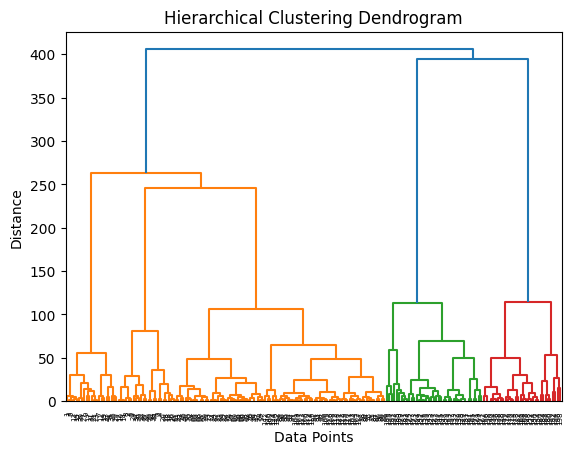

In [21]:
import scipy.cluster.hierarchy as sch

x = df.iloc[:, [2,3]].values

# Perform hierarchical clustering
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))

# Set labels and title
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')

# Display the dendrogram
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


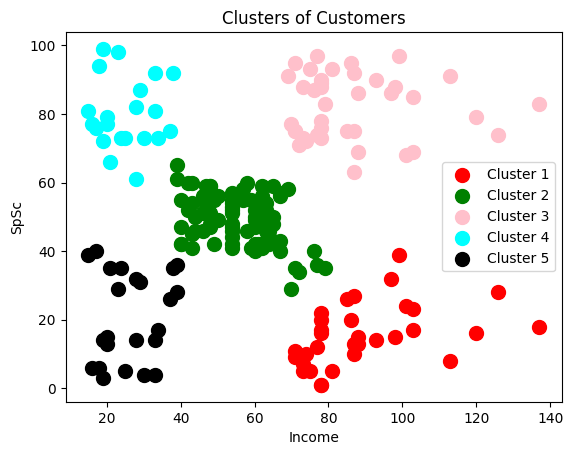

In [22]:
from sklearn.cluster import  AgglomerativeClustering

hc = AgglomerativeClustering (n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0,0], x[y_hc == 0,1], s=100, c='red', label='Cluster 1')
plt.scatter(x[y_hc == 1,0], x[y_hc == 1,1], s=100, c='green', label='Cluster 2')
plt.scatter(x[y_hc == 2,0], x[y_hc == 2,1], s=100, c='pink', label='Cluster 3')
plt.scatter(x[y_hc == 3,0], x[y_hc == 3,1], s=100, c='cyan', label='Cluster 4')
plt.scatter(x[y_hc == 4,0], x[y_hc == 4,1], s=100, c='black', label='Cluster 5')

plt.title('Clusters of Customers')
plt.xlabel('Income')
plt.ylabel('SpSc')
plt.legend()
plt.show()

**Spectral Clustering**

---

A graph-based clustering method that leverages the eigenvalues and eigenvectors of a similarity matrix. It involves constructing an affinity matrix based on pairwise similarities between data points and then performing dimensionality reduction using spectral decomposition. The reduced data is then clustered using traditional techniques like K-means.


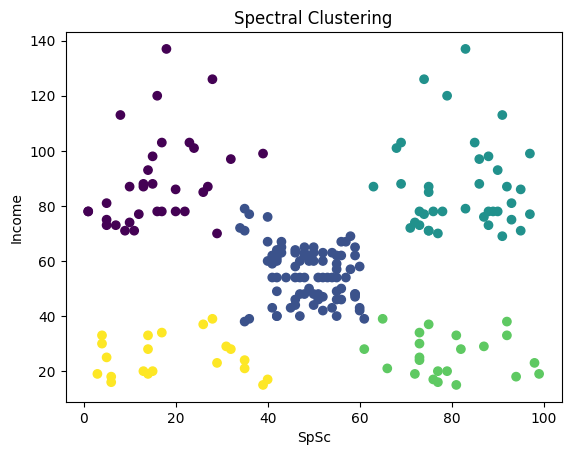

In [23]:
from sklearn.cluster import SpectralClustering

# Create a SpectralClustering instance
spectral_clustering = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', random_state=0)

# Fit and predict the clusters
clusters = spectral_clustering.fit_predict(df)

# Visualize the clusters (assuming 2D data)
plt.scatter(df['SpSc'], df['Income'], c=clusters, cmap='viridis')
plt.xlabel('SpSc')
plt.ylabel('Income')
plt.title('Spectral Clustering')

# Display the plot
plt.show()
